In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Activation,BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras import backend as K
(x_train, y_train),(x_test,y_test)=mnist.load_data()
num_classes=10
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
input_shape = (x_train.shape[1], x_train.shape[1], 1)

Using TensorFlow backend.


In [2]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
data_slice = 3000
x_train = x_train[:data_slice,:]
y_train = y_train[:data_slice,:]
x_test = x_test[:data_slice,:]
y_test = y_test[:data_slice,:]


In [4]:

model = Sequential()
model.add(Conv2D(32, (3,3), padding=("same"), activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3), padding=("same"), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding=("same"),activation='relu'))
model.add(Conv2D(64,(3,3),padding=("same"),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [5]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [6]:
history = model.fit(x_train,y_train, batch_size=28, epochs=5,verbose=1,validation_data=(x_test,y_test))


Train on 3000 samples, validate on 3000 samples
Epoch 1/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.6706 - accuracy: 0.8110 - val_loss: 1.6702 - val_accuracy: 0.9133
Epoch 2/5
3000/3000 [==============================] - 2s 695us/step - loss: 0.1587 - accuracy: 0.9527 - val_loss: 1.2658 - val_accuracy: 0.8813
Epoch 3/5
3000/3000 [==============================] - 2s 694us/step - loss: 0.0676 - accuracy: 0.9807 - val_loss: 0.3733 - val_accuracy: 0.9210
Epoch 4/5
3000/3000 [==============================] - 2s 693us/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.2076 - val_accuracy: 0.9450
Epoch 5/5
3000/3000 [==============================] - 2s 706us/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.2498 - val_accuracy: 0.9207


In [8]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


KeyError: 'acc'

In [9]:
# Perform t-distributed stochastic neighbor embedding.
import time
time_start = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',  random_state=0)
trans_data = tsne.fit_transform(model.predict(x_test.reshape((len(x_test), 28, 28, 1)))).T
print(trans_data.shape)
print("t-SNE: %.2g sec" % (time.time() - time_start))

(2, 3000)
t-SNE: 11 sec


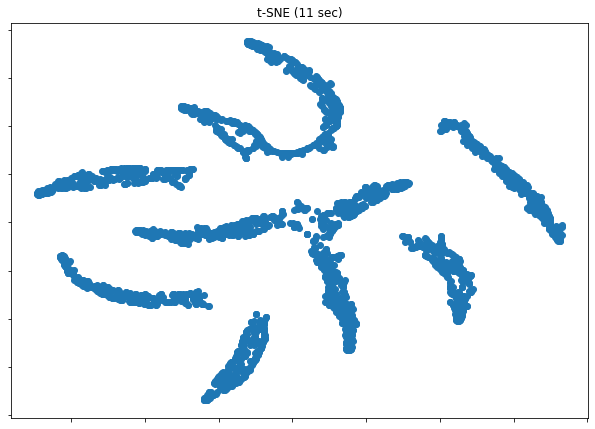

In [10]:
fig = plt.figure(figsize=(60, 16))
from matplotlib.ticker import NullFormatter
#(fig, subplots) = plt.subplots(1, 1, figsize=(15, 8))
ax = fig.add_subplot(252)
plt.scatter(trans_data[0], trans_data[1],  cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (time.time()-time_start))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()